In [ ]:
import seaborn
import re
import pandas as pd
import csv
import numpy as np

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
stopwords = set(stopwords.words('english'))

In [ ]:
# load data from csv
scp_df = pd.read_csv('scp6999.csv', header=0, delimiter=',', quoting=csv.QUOTE_ALL, encoding='utf-8', index_col=False, usecols=['code', 'title', 'text', 'link', 'rating'])

scp_df.head # quick check - note excel limits will mean opening in excel will cause issues (cells running into others etc)

<bound method NDFrame.head of           code  ...  rating
0      SCP-001  ...     NaN
1      SCP-002  ...  1697.0
2      SCP-003  ...   760.0
3      SCP-004  ...  1091.0
4      SCP-005  ...   640.0
...        ...  ...     ...
6994  SCP-6995  ...    55.0
6995  SCP-6996  ...   327.0
6996  SCP-6997  ...    96.0
6997  SCP-6998  ...   129.0
6998  SCP-6999  ...   546.0

[6999 rows x 5 columns]>

In [ ]:
# setting up some functions for later use - each takes single string of words space separated, including if prefiltered by pos

In [ ]:
def quick_clean(text):
  text = text.lower()
  clean_text = re.sub('[^a-zA-Z ]', '', text)
  return clean_text

In [ ]:
def remove_stopwords(text):
  return " ".join([i for i in text.split() if i not in stopwords])

In [ ]:
def pos_tag(text):
  return nltk.pos_tag(text.split())

In [ ]:
def create_wordcloud(text):
  wordcloud = WordCloud(max_font_size=80, max_words=50, background_color="white").generate(text)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [ ]:
def get_most_common(text):
  text = text.split()
  word_counts = {}
  for i in text:
    word_counts[i] = text.count(i)
  return sorted(word_counts.items(), key=lambda item: item[1], reverse=True)[:20]

In [ ]:
def plot_most_common(text, label='Word', clr="rocket"):
  bar = seaborn.barplot([i[1] for i in text], [i[0] for i in text], orient= 'h', palette=clr)
  seaborn.despine(left=True, bottom=True)
  bar.set_xlabel('Frequency')
  bar.set_ylabel(label)

## Title Analysis

Examining the text titles of SCP articles from the main series 1 to 7

In [ ]:
# extracting and preprocessing title text:
titles_raw = scp_df['title'].apply(lambda x: quick_clean(x))

### "Access Denied"

A significant minority of titles (and their articles) are not available.




In [ ]:
access_denied_count = len([i for i in list(scp_df['title']) if "access denied" in i.lower()])
print("Number of titles unavailable: {}".format(access_denied_count))
print("Percentage of titles unavailable: {}%".format(round(access_denied_count / len(scp_df) * 100, 1)))

Number of titles unavailable: 413
Percentage of titles unavailable: 5.9%


In [ ]:
# plotting the general distribution of unavailable titles
def get_unavailable_by_slice(data, slice_size):
  x_y_dict = {}
  for i in range(0, len(data), slice_size):
    x_y_dict["{}-{}".format(i, i + slice_size)] = len([i for i in list(data)[i: i + slice_size] if "access denied" in i.lower()])
  print("Unavailable by range: {}".format(x_y_dict))
  return [list([int(i.split("-")[1]) for i in x_y_dict.keys()]), list(x_y_dict.values())]


Unavailable by range: {'0-250': 0, '250-500': 0, '500-750': 0, '750-1000': 0, '1000-1250': 0, '1250-1500': 0, '1500-1750': 0, '1750-2000': 1, '2000-2250': 0, '2250-2500': 0, '2500-2750': 0, '2750-3000': 0, '3000-3250': 0, '3250-3500': 0, '3500-3750': 0, '3750-4000': 1, '4000-4250': 0, '4250-4500': 1, '4500-4750': 0, '4750-5000': 0, '5000-5250': 0, '5250-5500': 2, '5500-5750': 4, '5750-6000': 2, '6000-6250': 39, '6250-6500': 120, '6500-6750': 122, '6750-7000': 121}


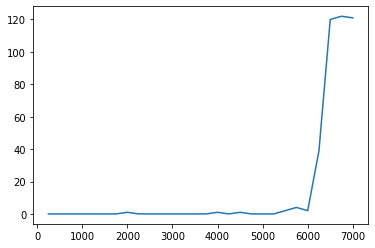

In [ ]:
x_y = get_unavailable_by_slice(scp_df['title'], 250)
plt.plot(x_y[0], x_y[1])

We can see that the vast majority of unavailable articles and titles are found in the final or 7th series, from index 6000 onwards.

These unavailable titles will be removed from further analysis to avoid skewing results (their titles are identical).

In [ ]:
# removing access denied from titles cleaned info
titles = [i for i in titles_raw if "access denied" not in i.lower()]

titles_nostopwords = [remove_stopwords(i) for i in titles]
titles_single_str = " ".join(titles)
titles_nostopwords_single_str = " ".join(titles_nostopwords)
pos_tagged = pos_tag(titles_single_str)

## Most Common ...

A look at the most common words of various types within the filtered titles

In [ ]:
# getting some bits of data for further use
nouns_as_str = " ".join([i[0] for i in pos_tagged if i[1]=='NN'])
adjectives_as_str = " ".join([i[0] for i in pos_tagged if i[1]=='JJ'])
verbs_as_str = " ".join([i[0] for i in pos_tagged if i[1]=='VB'])

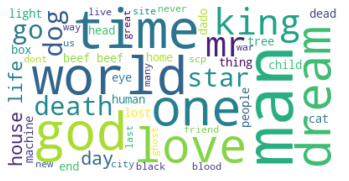

In [ ]:
create_wordcloud(titles_nostopwords_single_str)

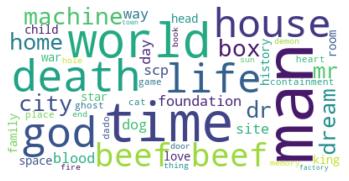

In [ ]:
create_wordcloud(nouns_as_str)

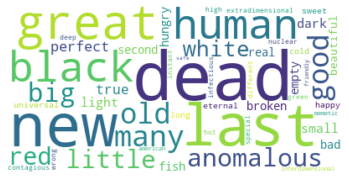

In [ ]:
create_wordcloud(adjectives_as_str)

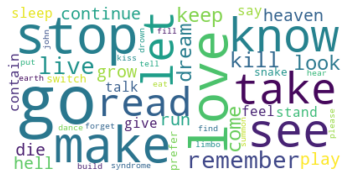

In [ ]:
create_wordcloud(verbs_as_str)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


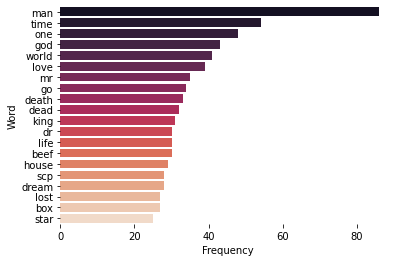

In [ ]:
plot_most_common(get_most_common(titles_nostopwords_single_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


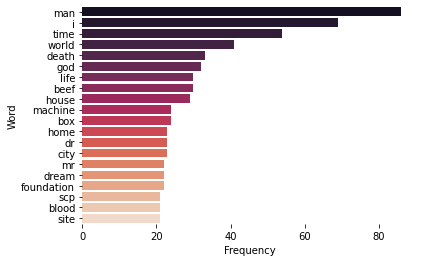

In [ ]:
plot_most_common(get_most_common(nouns_as_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


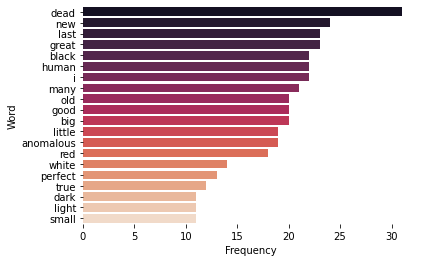

In [ ]:
plot_most_common(get_most_common(adjectives_as_str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


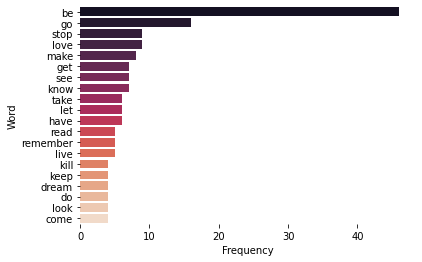

In [ ]:
plot_most_common(get_most_common(verbs_as_str))

## Ratings

Examining the ratings independent of other fields

### NaN

Blocked or unavailable articles do not have an accessible rating, and a quick look shows us there are other articles with no rating

In [ ]:
# no rating - key numbers
no_rating_num = len([i for i in list(scp_df['rating']) if np.isnan(i)])
print("Number of entries with no rating: {}".format(no_rating_num))
print("Percentage of entries with no rating: {}%".format(round(no_rating_num / len(scp_df)*100, 1)))

Number of entries with no rating: 470
Percentage of entries with no rating: 6.7%


In [ ]:
# investigating entries with no rating that are not blocked
no_rating = scp_df[scp_df['rating'].isna()]
no_rating_not_blocked = no_rating[~no_rating['title'].str.contains("access denied", case=False)]

In [ ]:
list(no_rating_not_blocked['code'])

['SCP-001',
 'SCP-231',
 'SCP-597',
 'SCP-695',
 'SCP-835',
 'SCP-1004',
 'SCP-2182',
 'SCP-2254',
 'SCP-2607',
 'SCP-2610',
 'SCP-2721',
 'SCP-3075',
 'SCP-3099',
 'SCP-3101',
 'SCP-3236',
 'SCP-3265',
 'SCP-3380',
 'SCP-3512',
 'SCP-3629',
 'SCP-3684',
 'SCP-3726',
 'SCP-3918',
 'SCP-3929',
 'SCP-4106',
 'SCP-4174',
 'SCP-4203',
 'SCP-4231',
 'SCP-4269',
 'SCP-4960',
 'SCP-4969',
 'SCP-5069',
 'SCP-5169',
 'SCP-5208',
 'SCP-5328',
 'SCP-5342',
 'SCP-5385',
 'SCP-5444',
 'SCP-5457',
 'SCP-5468',
 'SCP-5480',
 'SCP-5488',
 'SCP-5489',
 'SCP-5558',
 'SCP-5674',
 'SCP-5690',
 'SCP-5706',
 'SCP-5950',
 'SCP-6090',
 'SCP-6112',
 'SCP-6127',
 'SCP-6132',
 'SCP-6142',
 'SCP-6164',
 'SCP-6220',
 'SCP-6282',
 'SCP-6312',
 'SCP-6328',
 'SCP-6410',
 'SCP-6423',
 'SCP-6429',
 'SCP-6465',
 'SCP-6743',
 'SCP-6771',
 'SCP-6779',
 'SCP-6802',
 'SCP-6858',
 'SCP-6908',
 'SCP-6952',
 'SCP-6959',
 'SCP-6961',
 'SCP-6969',
 'SCP-6972',
 'SCP-6978',
 'SCP-6985']

We can see that in the majority of cases, those lacking ratings (without this being accounted for by having access denied) are flagged as adult content.

Visiting one of the links shows that there was basic user input required to see these pages, which the scraper did not account for and therefore some content is missing.

This would be a key improvement to make in scraping again or adding these entries separately.

For now, all rows with missing ratings will be filtered out.

In [ ]:
# filtering out nan ratings with dropna - size of resulting dataframe also suggests there are no other columns with null values
no_nan_ratings = scp_df.dropna()
no_nan_ratings

In [ ]:
ratings_list = list(no_nan_ratings['rating'])

In [ ]:
# average rating - mode median mean
most_frequent_rating = max(ratings_list, key=ratings_list.count)
print("Most common rating: {}".format(int(most_frequent_rating)))

median_rating = sorted(ratings_list)[len(ratings_list)//2]
print("Median rating: {}".format(int(median_rating)))

average_rating = sum(ratings_list)/len(ratings_list)
print("Average rating: {}".format(int(average_rating)))

print("Highest rating: {}. Lowest rating: {}".format(int(max(ratings_list)), int(min(ratings_list))))

# this negative rating looks suspicious at first, but downvotes are allowed and checking the link shows that it is accurate
# no_nan_ratings[no_nan_ratings['rating']==-30]

Most common rating: 47
Median rating: 107
Average rating: 170
Highest rating: 7624. Lowest rating: -30
